<a href="https://colab.research.google.com/github/buchijw/Long_ML_Course/blob/main/1_RDKIT_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Install RDKit**


This Notebook is designed to give total beginners in cheminformatics a first glimpse at the usage of Rdkit. It is used in workshops for natural scientists (master students and graduate students). It is not meant to be used for self studying.



In [ ]:
# install rdkit mols2grid
# !pip install rdkit-pypi mols2grid tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.7 MB 6.0 MB/s 


In [1]:
#collapse-hide
import matplotlib.pyplot as plt

from io import BytesIO
import pandas as pd
import numpy as np
from IPython.display import SVG

# RDKit 
import rdkit
from rdkit import Chem #RDKit Chemistry
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import rdRGroupDecomposition
from rdkit.Chem.Draw import IPythonConsole #RDKit drawing => visualize
from rdkit.Chem import Draw #RDKit drawing
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions #Only needed if modifying defaults


# A few settings to improve the quality of structures 
from rdkit.Chem import rdDepictor
DrawingOptions.bondLineWidth=1.8
IPythonConsole.ipython_useSVG=True
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem import PandasTools #Add the ability to add a molecule to a dataframegrid
import mols2grid #The mols2grid library provides a convenient way of displaying molecules in a grid

from rdkit import RDLogger
RDLogger.DisableLog('rdApp.warning')


[RDKit](https://rdkit.org/) is an open-source cheminformatics software package which allows its users to easily work with molecules *in silico*. 
This is very useful if you want to work with molecule-dependent data (e.g. calculate the molecular weight of a set of compounds), if you want to display sets of molecules or if you want to do complex calculations or visualisations on molecules.
A great starting point (as well as quick-lookup opportunity) is [Rdkit getting started](https://www.rdkit.org/docs/GettingStartedInPython.html) and the [Rdkit cookbook](http://www.rdkit.org/docs/Cookbook.html). 

RDKit allows us to create molecule instances from molecule string representations called [SMILES](https://daylight.com/dayhtml_tutorials/languages/smiles/index.html). 
[SMILES](https://daylight.com/dayhtml_tutorials/languages/smiles/index.html) are not the focus of this Tutorial, if you want to learn more go the this [Tutorial](https://daylight.com/dayhtml_tutorials/languages/smiles/index.html).
After importing the Chem package we can create a molecule from a SMILES string, for example benzene:

# **2. Visualize Molecules**

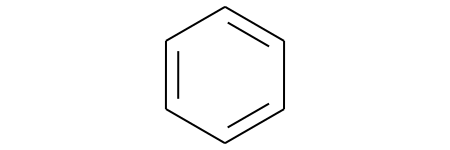

In [2]:
from rdkit.Chem import MolFromSmiles
bz = MolFromSmiles('c1ccccc1')
display(bz)

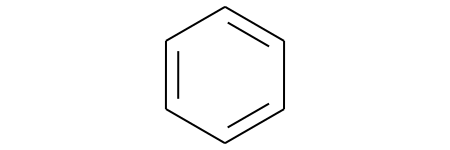

In [3]:
from rdkit import Chem
benzene = Chem.MolFromSmiles('c1ccccc1')
display(benzene)

If we just type out a molecule in a jupyter notebook like this, it is displayed. 
This also works with more complicated molecules like caffeine:

In [ ]:
# CN1C=NC2=C1C(=O)N(C(=O)N2C)C

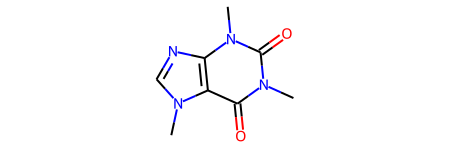

In [4]:
caffeine = Chem.MolFromSmiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')
caffeine

In addition of visualising single molecules, rdkit also allows us to compute a plethora of different descriptors of molecules. 
For example the number of bonds of a molecule, the number of atoms except hydrogen or the molecular weight of a compound:

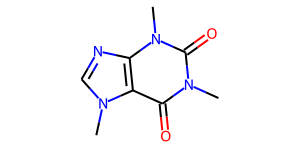

In [5]:
from IPython.display import SVG
from rdkit.Chem import rdDepictor as rdd
from rdkit.Chem.Draw import rdMolDraw2D as draw2d

def draw2D(m):
    molSize = (300, 150)                    # draw area 
    mc = Chem.Mol(m.ToBinary())    
    if not mc.GetNumConformers():
        rdd.Compute2DCoords(mc)             # compute 2D coordinates of atoms
    drawer = draw2d.MolDraw2DSVG(\
        molSize[0],molSize[1])              # initialize drawer with size
    drawer.DrawMolecule(mc)                 # draw the molecule
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()           # get the SVG string 
    display(SVG(svg.replace('svg:','')))    # fix and display in Jupyter notebook
    
draw2D(caffeine)

In [6]:
from rdkit.Chem import Descriptors
print(caffeine.GetNumBonds())
print(caffeine.GetNumHeavyAtoms())
print(Descriptors.MolWt(caffeine))

15
14
194.194


Rdkit allows us not only to read in single molecules, but also sets of molecules that are in files. 
In this example we read in the file *some_dud_ligands.smi*, save the number of heavy atoms of all the molecules inside in a list and print that list:

In [8]:
import pathlib
import os
os.chdir("./Data")

#smi_file = os.path.join(root_dir,'Data','some_dud_ligands.smi')
suppl = Chem.SmilesMolSupplier("some_dud_ligands.smi")
list_of_atomnumbers = []
for mol in suppl:
    list_of_atomnumbers.append(mol.GetNumAtoms())
print(list_of_atomnumbers)

[17, 16, 16, 15, 15, 18, 18, 16, 17, 21, 15, 19, 20, 21, 21, 23, 19, 23, 21, 21, 18, 25, 25, 25, 28, 29, 22, 23, 27, 25, 27, 23, 26, 20, 17, 25, 24, 21, 25, 28, 23, 22, 18, 13, 9, 9, 15, 27, 29, 30, 21, 16, 21, 24, 24, 22, 23, 22, 18, 22, 23, 22, 22, 22, 23, 24, 23, 22, 24, 23, 23, 24, 23, 23, 22, 23, 25, 25, 24, 24, 23, 23, 26, 28, 25, 26, 24, 26, 24, 24, 23, 29, 27, 25, 23, 26, 33, 23, 27]


Using pandas we can also read in a table containing the names of the molecules in the SMILES file and some arbitrary data:

In [9]:
import pandas as pd
molecule_data = pd.read_csv("molecule_data.csv", index_col=0)
print(molecule_data.head())

       Molnames  Data 1   Data 2  Data 3  Data 4  Data 5  Data 6  Data 7  \
0  ZINC01717164       0  HERBERT     123    7345       6      31       2   
1  ZINC02156329       0  HERBERT     123    7345       6      31       2   
2  ZINC03814205       0  HERBERT     123    7345       6      31       2   
3  ZINC03814207       0  HERBERT     123    7345       6      31       2   
4  ZINC03814208       0  HERBERT     123    7345       6      31       2   

   Data 8  Data 9  
0       5       3  
1       5       3  
2       5       3  
3       5       3  
4       5       3  


Using the PandasTools functionality we can combine the information in the SMILES file and the data in the table and create molecular depictions inside our dataframe. 
We can then export this as an HTML document or as an excel file, which can then be shared with others.

,Molnames,Molecule,Data 1,Data 2,Data 3,Data 4,Data 5,Data 6,Data 7,Data 8,Data 9
0,ZINC01717164,,0,HERBERT,123,7345,6,31,2,5,3
1,ZINC02156329,,0,HERBERT,123,7345,6,31,2,5,3
2,ZINC03814205,,0,HERBERT,123,7345,6,31,2,5,3
3,ZINC03814207,,0,HERBERT,123,7345,6,31,2,5,3
4,ZINC03814208,,0,HERBERT,123,7345,6,31,2,5,3
5,ZINC03814209,,0,HERBERT,123,7345,6,31,2,5,3
6,ZINC03814210,,0,HERBERT,123,7345,6,31,2,5,3
7,ZINC03814211,,0,HERBERT,123,7345,6,31,2,5,3
8,ZINC03814212,,0,HERBERT,123,7345,6,31,2,5,3
9,ZINC03814213,,0,HERBERT,123,7345,6,31,2,5,3

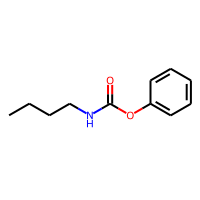
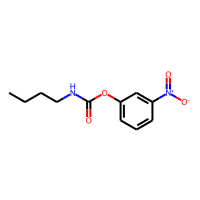
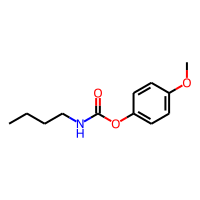
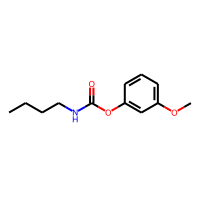
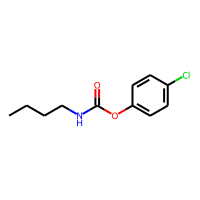
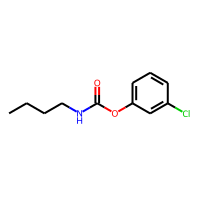
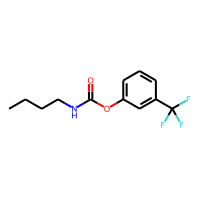
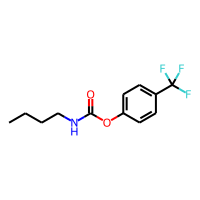
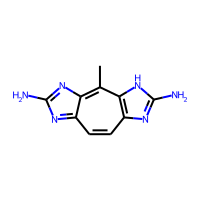
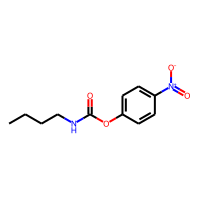
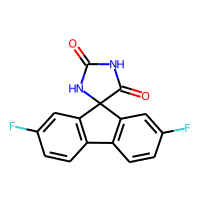
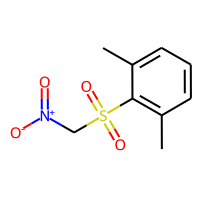
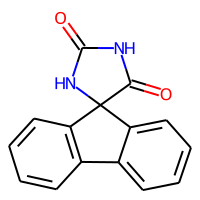
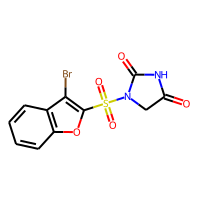
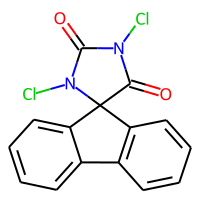
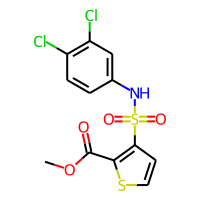
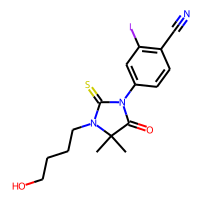
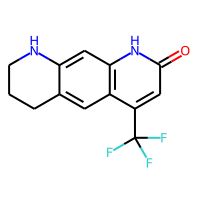
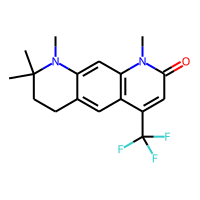
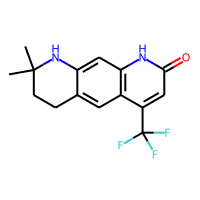
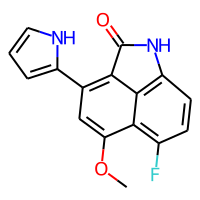
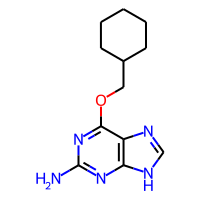
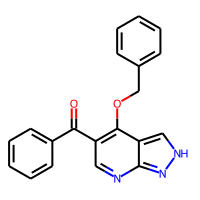
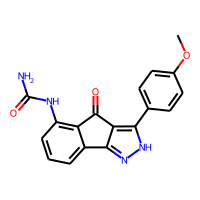
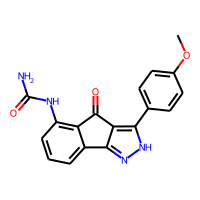
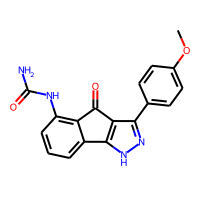
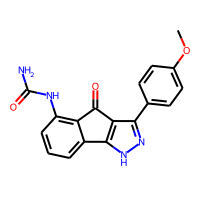
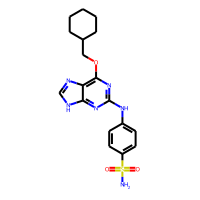
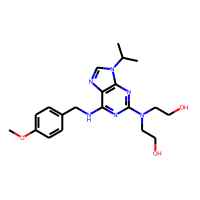
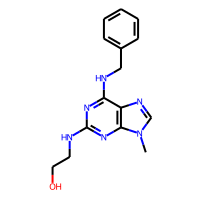
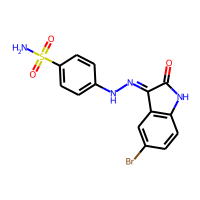
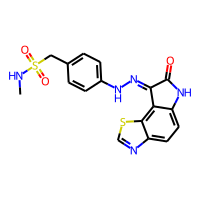
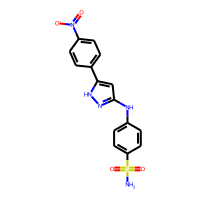
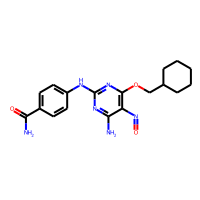
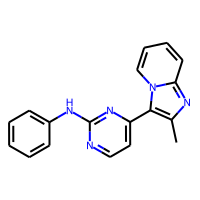
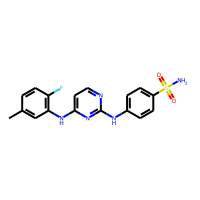
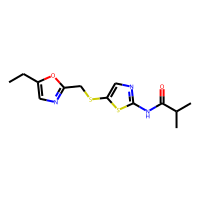
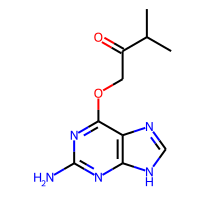
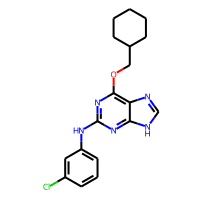
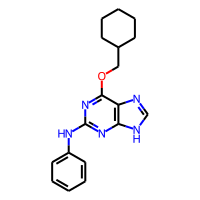
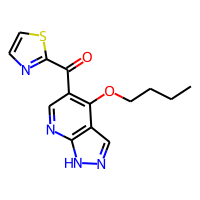
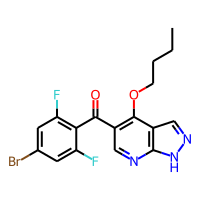
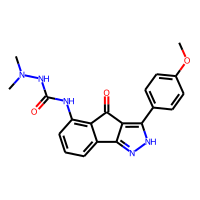
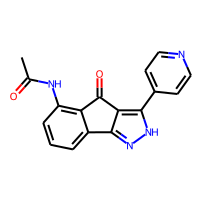
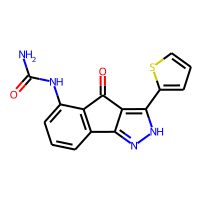
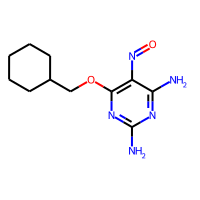
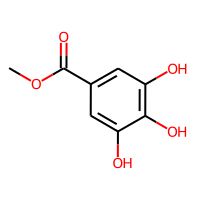
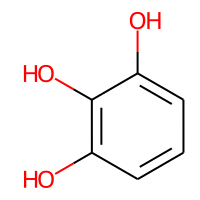
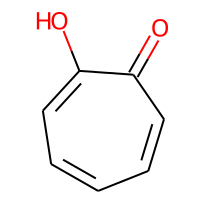
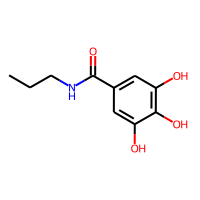
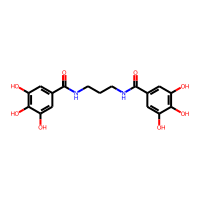
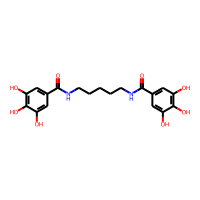
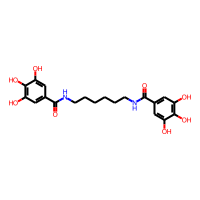
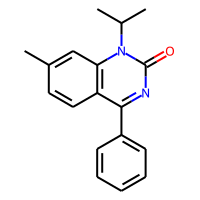
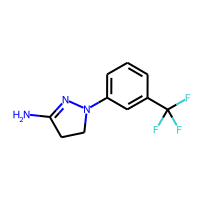
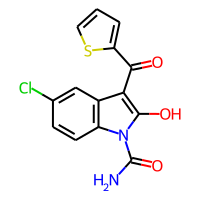
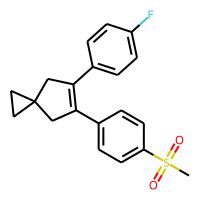
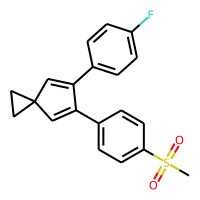
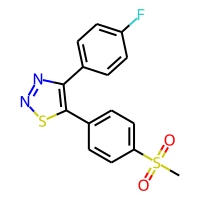
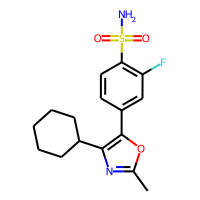
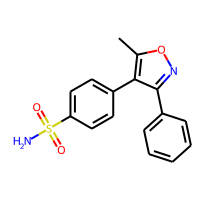
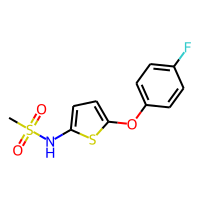
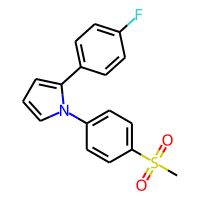
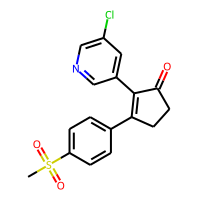
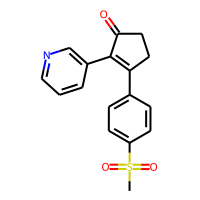
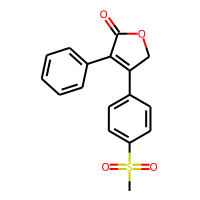
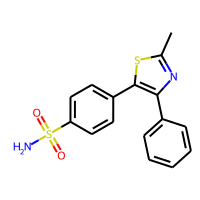
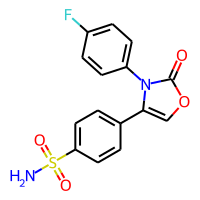
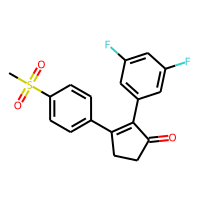
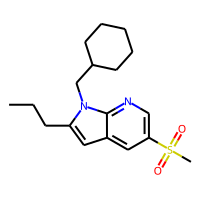
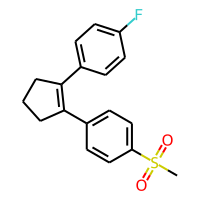
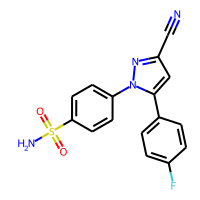
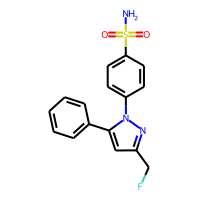
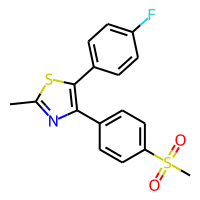
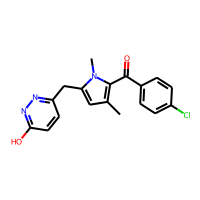
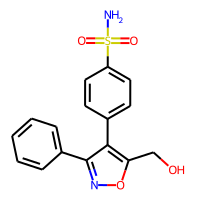
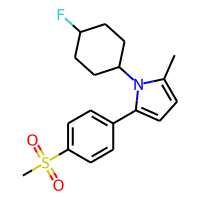
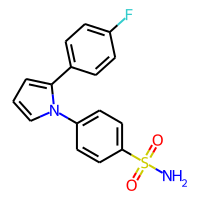
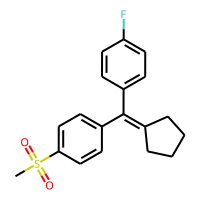
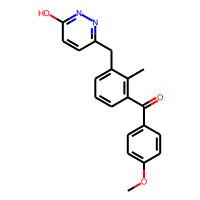
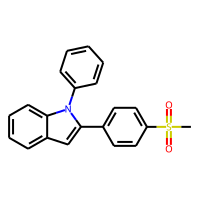
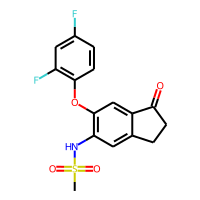
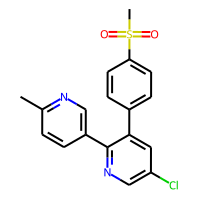
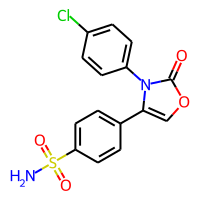
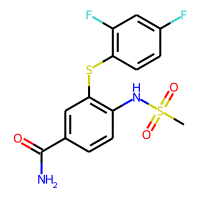
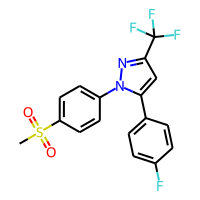
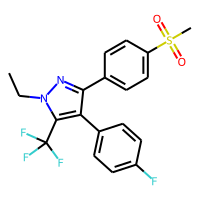
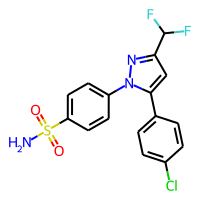
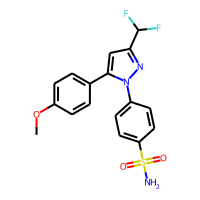
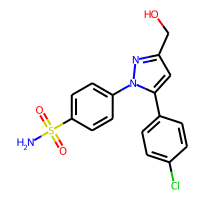
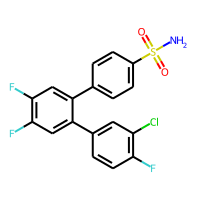
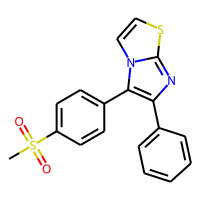
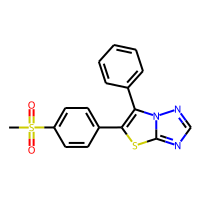
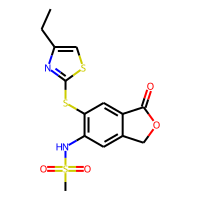
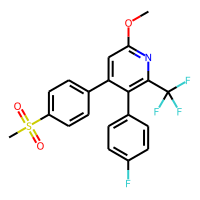
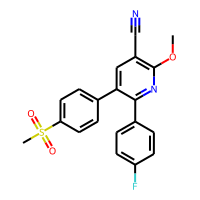
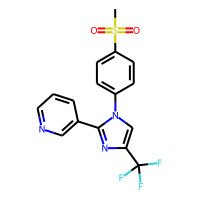
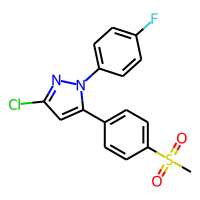
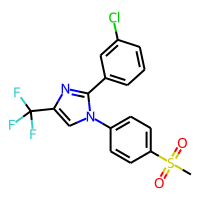
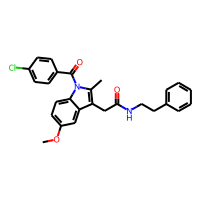
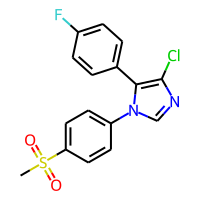
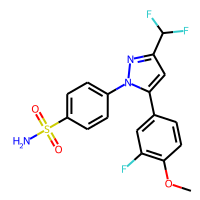

In [10]:
from rdkit.Chem import PandasTools
import IPython
smile_dataframe = pd.read_csv("some_dud_ligands.smi",sep=" ", names=["Smiles", "Molnames"])
PandasTools.AddMoleculeColumnToFrame(smile_dataframe,'Smiles','Molecule',includeFingerprints=False)
PandasTools.ChangeMoleculeRendering(frame=smile_dataframe, renderer="PNG")
smile_dataframe = smile_dataframe.drop("Smiles", axis=1)
data_full = pd.merge(smile_dataframe,molecule_data, on="Molnames")
htm = data_full.to_html()
IPython.display.HTML(htm)

# **3. SDF file**
Read sdf file by Chem.SDMolSupplier Module

In [13]:
import os
# os.chdir("./Data")
mols = [x for x in Chem.SDMolSupplier("example_compounds.sdf")]
mols

Draw these molecules as a grid

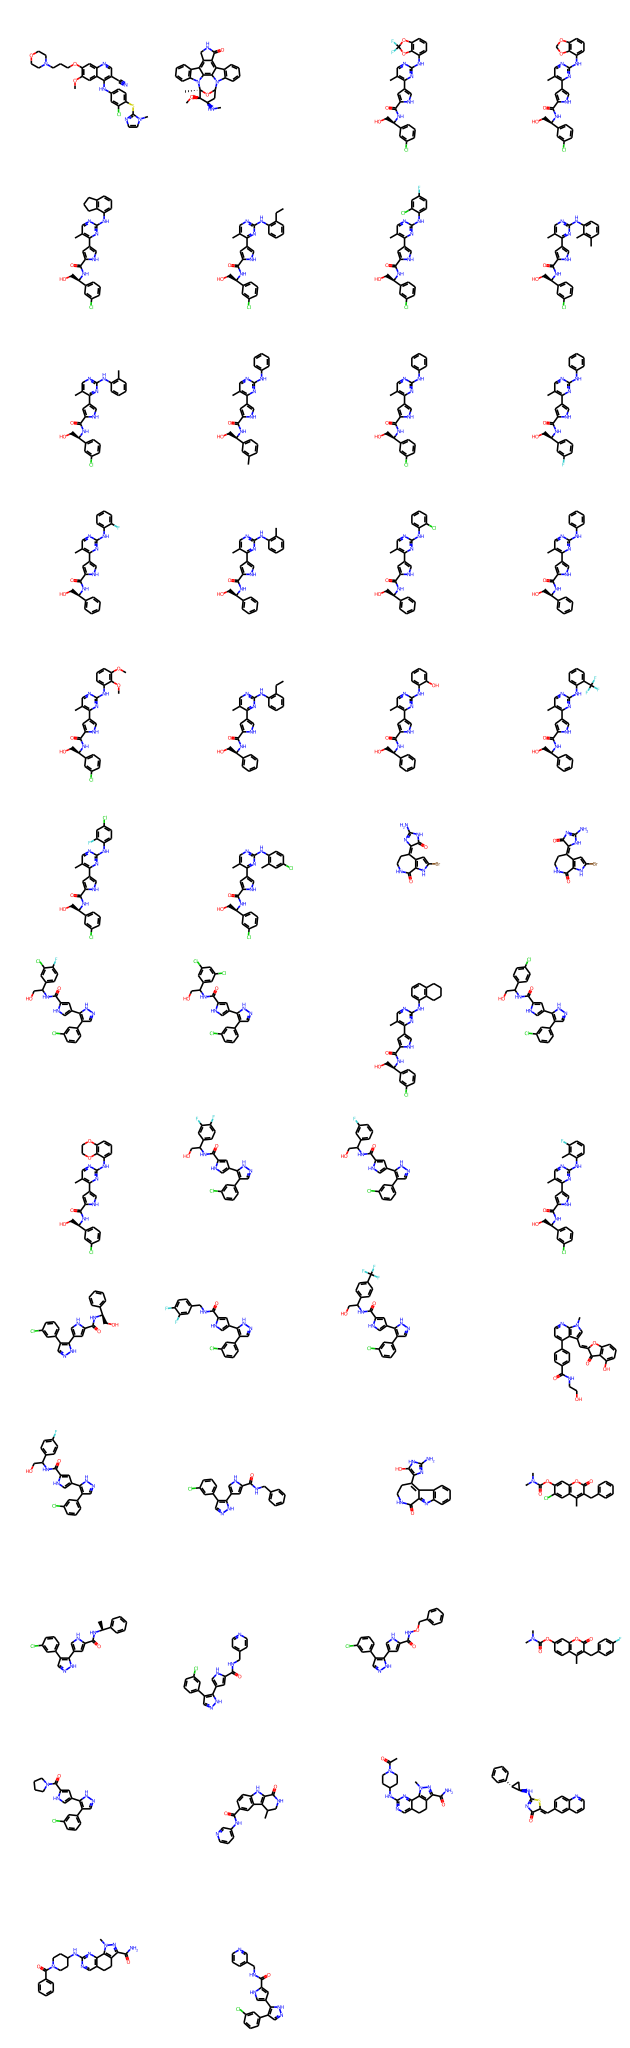

In [14]:
Draw.MolsToGridImage(mols,molsPerRow=4,useSVG=True)

We can use the mols2grid library to display molecules in a grid

In [15]:
mols2grid.display(mols)

In [16]:
mols2grid.selection

/Users/johnwilliam/opt/anaconda3/envs/Long_ML/lib/python3.9/site-packages/mols2grid/select.py:107: UserWarning: Accessing the current grid's selection through `mols2grid.selection` is deprecated and will be removed soon. Please use `mols2grid.get_selection()` instead
  warnings.warn(


{}

We can also read an SD file into a Pandas dataframe.

,ID,ROMol
0,168691 CHEMBL318804,
1,86358 CHEMBL162,
2,575087 CHEMBL576683,
3,575065 CHEMBL571484,
4,575047 CHEMBL568937,

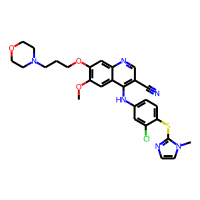
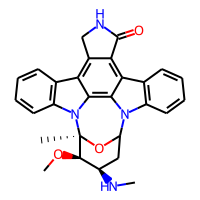
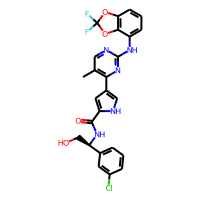
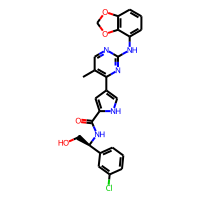
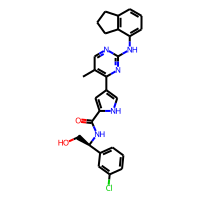

In [17]:
df = PandasTools.LoadSDF("example_compounds.sdf")
df.head()

Let's add columns with molecular weight and LogP to the dataframe.

/Users/johnwilliam/opt/anaconda3/envs/Long_ML/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 50/50 [00:00<00:00, 1261.41it/s]


,ID,ROMol,MW,LogP
0,168691 CHEMBL318804,,565.099,5.49788
1,86358 CHEMBL162,,466.541,4.35400

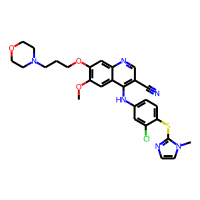
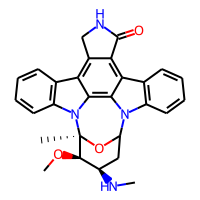

In [18]:
from tqdm.auto import tqdm
from rdkit.Chem.Descriptors import MolWt
from rdkit.Chem.Crippen import MolLogP
tqdm.pandas()
df['MW'] = df.ROMol.progress_apply(MolWt)
df['LogP'] = df.ROMol.progress_apply(MolLogP)
df.head(2)

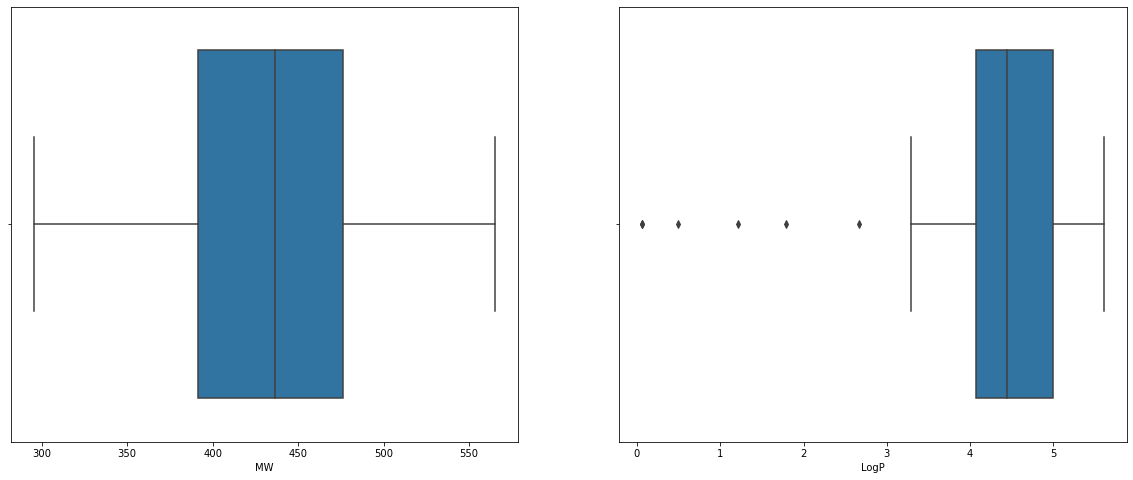

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,8))
plt.subplot(121)
ax = sns.boxplot(x=df.MW)
plt.subplot(122)
ax = sns.boxplot(x=df.LogP)

# **4. Substructures**

Substructures are very important in cheminformatics. A substructure is just a part of a molecule. For example, look at the molecule below to the left. I’ve highlighted just one substructure of the molecule in yellow, which is isolated and shown to the right. Why are substructures important?

In [20]:
mol = Chem.MolFromSmiles('CC(N)C(=O)O')

# load a substructure from a SMILES string
pattern = Chem.MolFromSmiles('CCO')

# perform substructure match on mol
mol.HasSubstructMatch(pattern)    # returns true

True

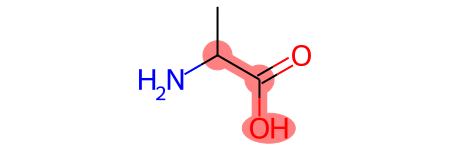

In [21]:
mol.GetSubstructMatches(pattern)
mol

We can also look for substuctures inside molecules using a language called [SMARTS](https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html).
In this example, we calculate if caffeeine contains an imidazole substructure. 
If we now display the molecule again and the substructure was found, it is also highlighted:

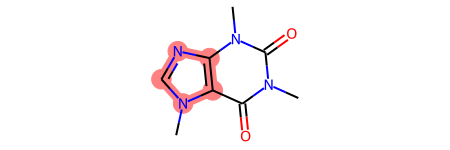

In [22]:
imidazole = Chem.MolFromSmarts('c1ncnc1')
caffeine.GetSubstructMatches(imidazole)
caffeine

# **5. Pandas in chemoinformatics**

In [23]:
import pandas as pd
from rdkit import Chem
from tqdm.auto import tqdm
from rdkit.Chem.Draw import MolsToGridImage
import seaborn as sns
import os
# os.chdir("/content/drive/MyDrive/MedAI/1. Chemoinformatics/Data/")

In [25]:
df = pd.read_csv("solubility_data_ok.csv")
df.head(5)

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,bin,is_sol
0,A-14,bis(4-fluorophenyl)methanone,InChI=1S/C13H8F2O/c14-11-5-1-9(2-6-11)13(16)10...,LSQARZALBDFYQZ-UHFFFAOYSA-N,Fc1ccc(cc1)C(=O)c2ccc(F)cc2,-4.396652,0.431513,2,G3,218.202,...,2.0,0.0,0.0,2.0,17.07,91.346032,2.315628e+00,452.960733,Medium,False
1,A-15,1-[2-(benzoyloxy)propoxy]propan-2-yl benzoate ...,InChI=1S/C20H22O5/c21-19(17-9-3-1-4-10-17)24-1...,BYQDGAVOOHIJQS-UHFFFAOYSA-N,O=C(OCCCOCCCOC(=O)c1ccccc1)c2ccccc2,-4.595503,0.118551,2,G3,342.391,...,2.0,0.0,0.0,2.0,61.83,147.071714,1.447050e+00,582.150793,Low,False
2,A-19,"2,3-dimethylphenol; 2,4-dimethylphenol; 2,5-di...",InChI=1S/6C8H10O/c1-6-3-7(2)5-8(9)4-6;1-6-3-4-...,YJZHZFOWHRKQHS-UHFFFAOYSA-N,Cc1ccc(O)c(C)c1.Cc2ccc(C)c(O)c2.Cc3cc(C)cc(O)c...,-1.980310,0.155859,4,G5,733.002,...,6.0,0.0,0.0,6.0,121.38,322.890738,3.240000e-07,1804.418547,High,True
3,A-23,"(2E)-3,7-dimethylocta-2,6-dien-1-ol","InChI=1S/C10H18O/c1-9(2)5-4-6-10(3)7-8-11/h5,7...",GLZPCOQZEFWAFX-YFHOEESVSA-N,CC(C)=CCC\C(C)=C/CO,-2.320601,0.071633,4,G5,154.253,...,0.0,0.0,0.0,0.0,20.23,69.438758,3.544387e+00,150.255712,High,True
4,A-24,2-(4-chloro-2-methylphenoxy)propanoic acid,InChI=1S/C10H11ClO3/c1-6-5-8(11)3-4-9(6)14-7(2...,WNTGYJSOUMFZEP-UHFFFAOYSA-N,CC(Oc1ccc(Cl)cc1C)C(O)=O,-2.466031,0.060621,4,G5,214.648,...,1.0,0.0,0.0,1.0,46.53,87.263739,2.817665e+00,349.220389,High,True


Examine the datatypes for the dataframe

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1818 entries, 0 to 1817
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1818 non-null   object 
 1   Name                 1818 non-null   object 
 2   InChI                1818 non-null   object 
 3   InChIKey             1818 non-null   object 
 4   SMILES               1818 non-null   object 
 5   Solubility           1818 non-null   float64
 6   SD                   1818 non-null   float64
 7   Ocurrences           1818 non-null   int64  
 8   Group                1818 non-null   object 
 9   MolWt                1818 non-null   float64
 10  MolLogP              1818 non-null   float64
 11  MolMR                1818 non-null   float64
 12  HeavyAtomCount       1818 non-null   float64
 13  NumHAcceptors        1818 non-null   float64
 14  NumHDonors           1818 non-null   float64
 15  NumHeteroatoms       1818 non-null   f

The Pandas describe function provides summary statistics for numeric dataframe columns

In [27]:
df.describe()

,Solubility,SD,Ocurrences,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
count,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000
mean,-2.754254,0.139735,2.556656,223.411122,1.911061,56.790412,14.502750,2.693619,0.940044,4.110561,3.064906,79.126513,0.885039,0.268977,0.399890,1.284928,48.478025,92.156194,2.505934,350.657890
std,2.290540,0.134093,0.978206,152.290204,3.416809,40.423515,10.330118,3.122199,1.512098,3.866995,4.334801,55.511069,1.148561,1.222039,1.344034,1.735449,53.862117,63.910341,1.025446,409.857326
min,-12.060500,0.005000,2.000000,17.031000,-27.344800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.504228,-0.000002,0.000000
25%,-4.096709,0.032283,2.000000,134.222000,0.842750,34.823000,9.000000,1.000000,0.000000,2.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,17.070000,56.372354,2.190610,105.193067
50%,-2.462850,0.090000,2.000000,191.261500,1.964900,48.155400,13.000000,2.000000,1.000000,3.000000,2.000000,68.000000,1.000000,0.000000,0.000000,1.000000,37.300000,78.217533,2.719442,256.033013
75%,-1.083623,0.208650,3.000000,273.822750,3.320950,71.139100,18.000000,4.000000,1.000000,5.000000,4.000000,94.000000,1.000000,0.000000,0.000000,2.000000,66.400000,113.099505,3.106761,473.045498
max,1.536339,0.500000,12.000000,2285.676000,33.968960,699.523400,164.000000,40.000000,24.000000,46.000000,55.000000,938.000000,16.000000,30.000000,30.000000,30.000000,633.200000,1003.761596,6.978597,4995.820440


The columns attribute of dataframe provides the column names

In [28]:
df.columns

Index(['ID', 'Name', 'InChI', 'InChIKey', 'SMILES', 'Solubility', 'SD',
       'Ocurrences', 'Group', 'MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount',
       'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA', 'BalabanJ',
       'BertzCT', 'bin', 'is_sol'],
      dtype='object')

The sort_values function sorts a dataframe. Note that this returns another dataframe. To sort the dataframe in place set inplace=True

In [29]:
df.sort_values("Group",ascending=False)

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,bin,is_sol
1817,I-94,warfarin,InChI=1S/C19H16O4/c1-12(20)11-15(13-7-3-2-4-8-...,PJVWKTKQMONHTI-UHFFFAOYSA-N,CC(=O)CC(c1ccccc1)c1c(O)c2ccccc2oc1=O,-4.780000,0.450506,3,G5,308.333,...,3.0,0.0,0.0,3.0,67.51,132.552025,2.258072,909.550973,Low,False
1482,D-1486,propyl butyrate,"InChI=1S/C7H14O2/c1-3-5-7(8)9-6-4-2/h3-6H2,1-2H3",HUAZGNHGCJGYNP-UHFFFAOYSA-N,CCCOC(=O)CCC,-1.905000,0.076848,3,G5,130.187,...,0.0,0.0,0.0,0.0,26.30,56.203971,3.061317,78.985336,High,True
486,A-3435,"2-hydroxypropane-1,2,3-tricarboxylic acid","InChI=1S/C6H8O7/c7-3(8)1-6(13,5(11)12)2-4(9)10...",KRKNYBCHXYNGOX-UHFFFAOYSA-N,OC(=O)CC(O)(CC(O)=O)C(O)=O,0.476843,0.081865,5,G5,192.123,...,0.0,0.0,0.0,0.0,132.13,72.225463,4.619312,227.367322,High,True
487,A-3437,"1H-1,2,4-triazol-3-amine","InChI=1S/C2H4N4/c3-2-4-1-5-6-2/h1H,(H3,3,4,5,6)",KLSJWNVTNUYHDU-UHFFFAOYSA-N,Nc1[nH]ncn1,0.832693,0.291135,4,G5,84.082,...,1.0,0.0,0.0,1.0,67.59,34.388204,3.049648,109.108506,High,True
1237,B-4638,nicotinic acid,"InChI=1S/C6H5NO2/c8-6(9)5-2-1-3-7-4-5/h1-4H,(H...",PVNIIMVLHYAWGP-UHFFFAOYSA-N,OC(=O)c1cccnc1,-0.835000,0.474968,3,G5,123.111,...,1.0,0.0,0.0,1.0,50.19,51.971749,2.981455,207.557662,High,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,B-177,bromoform,InChI=1S/CHBr3/c2-1(3)4/h1H,DIKBFYAXUHHXCS-UHFFFAOYSA-N,BrC(Br)Br,-1.911300,0.051650,2,G3,252.731,...,0.0,0.0,0.0,0.0,0.00,50.341894,2.323790,8.000000,High,True
805,B-169,propyne,"InChI=1S/C3H4/c1-3-2/h1H,2H3",MWWATHDPGQKSAR-UHFFFAOYSA-N,CC#C,-1.041700,0.315850,2,G3,40.065,...,0.0,0.0,0.0,0.0,0.00,20.468361,2.475534,21.509775,High,True
804,B-160,quinethazone,InChI=1S/C10H12ClN3O3S/c1-2-9-13-7-4-6(11)8(18...,AGMMTXLNIQSRCG-UHFFFAOYSA-N,CCC1NC(=O)c2cc(c(Cl)cc2N1)[S](N)(=O)=O,-3.285900,0.007050,2,G3,289.744,...,1.0,0.0,1.0,2.0,101.29,109.550520,2.575948,615.039074,High,True
803,B-157,adenine,InChI=1S/C5H5N5/c6-4-3-5(9-1-7-3)10-2-8-4/h1-2...,GFFGJBXGBJISGV-UHFFFAOYSA-N,Nc1ncnc2nc[nH]c12,-2.117900,0.071050,2,G3,135.130,...,2.0,0.0,0.0,2.0,80.48,56.321063,2.950090,351.565797,High,True


The tqdm library provides a simple way of adding a progress bar to a python program.

In [30]:
tqdm.pandas()
df['Mol'] = df.SMILES.progress_apply(Chem.MolFromSmiles)

100%|██████████| 1818/1818 [00:00<00:00, 7260.76it/s]


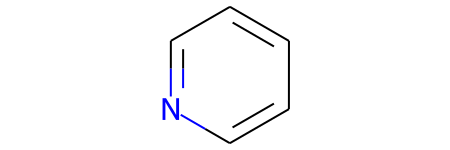

In [40]:
query = Chem.MolFromSmiles("c1ccccn1")
query

In [41]:
df['pyridine'] = [x.HasSubstructMatch(query) for x in tqdm(df.Mol)]

100%|██████████| 1818/1818 [00:00<00:00, 36913.79it/s]


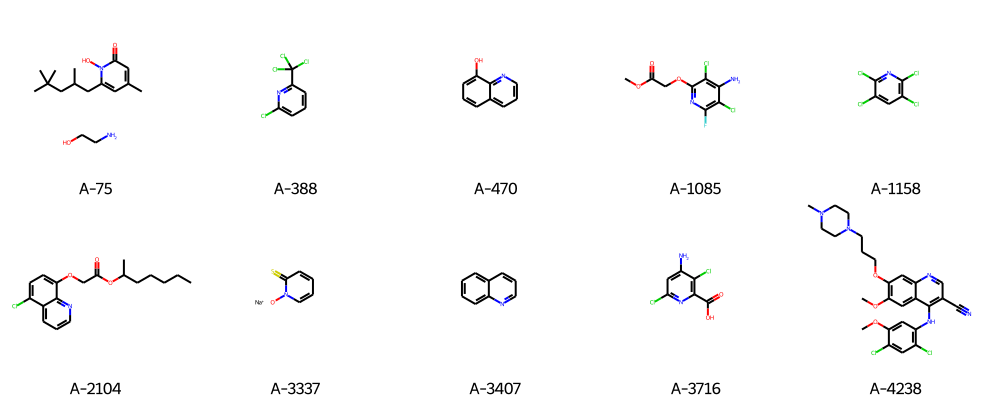

In [42]:
hits = df.query("pyridine").head(10)
MolsToGridImage(hits.Mol,legends=hits.ID.to_list(),molsPerRow=5)

In [43]:
match_list = [x.GetSubstructMatch(query) for x in hits.Mol]

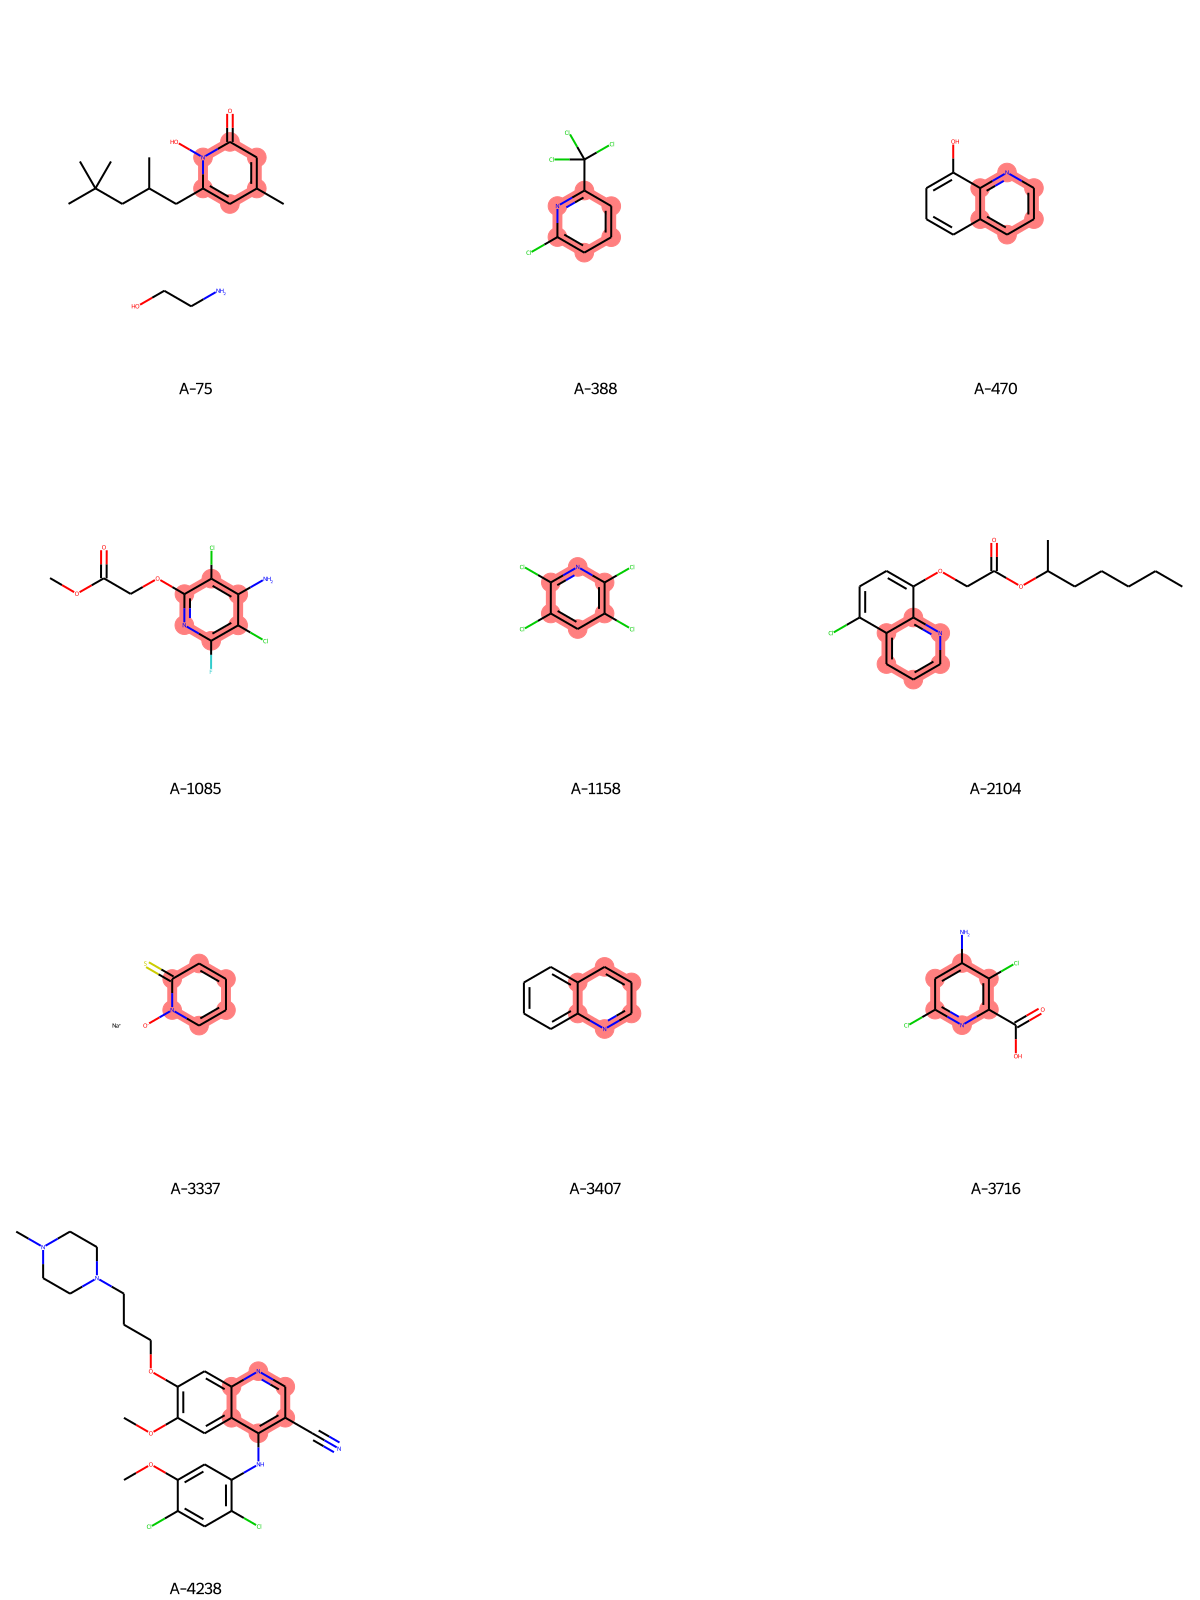

In [44]:
MolsToGridImage(hits.Mol,legends=hits.ID.to_list(),molsPerRow=3,highlightAtomLists=match_list,subImgSize=(400, 400))

In [45]:
res = []
for k,v in df.groupby("Group"):
    res.append([k,len(v),v.Solubility.mean()])
res_df = pd.DataFrame(res,columns=["Group","Size","Mean"]).round(decimals=2)
res_df

,Group,Size,Mean
0,G3,1182,-2.79
1,G5,636,-2.68


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


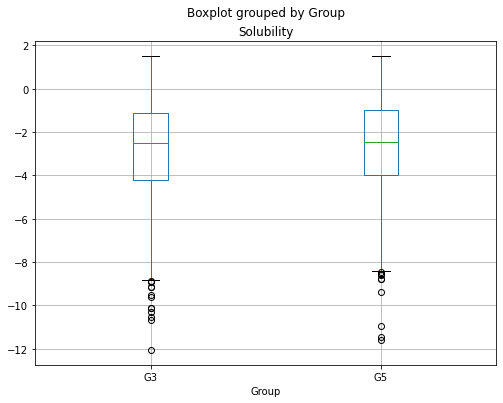

In [ ]:
df.boxplot(column="Solubility",by="Group",figsize=(8,6))

<AxesSubplot:xlabel='Group', ylabel='Solubility'>

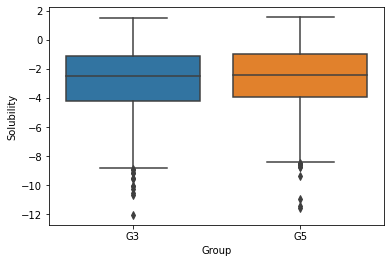

In [46]:
sns.boxplot(x="Group",y="Solubility",data=df)

# **7. Usefil utils**

In [47]:
# !pip install tqdm seaborn mols2grid sklearn pingouin

In [48]:
# !pip install git+https://github.com/PatWalters/useful_rdkit_utils

In [49]:
import useful_rdkit_utils as uru
import pandas as pd
from rdkit import Chem
from tqdm.auto import tqdm
import seaborn as sns
import mols2grid
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
import numpy as np
import pingouin

## 7.1. Preliminary Setup

In [50]:
tqdm.pandas()

In [51]:
mol_buff = """Nc1ccc(S(=O)(=O)Nc2ccccn2)cc1 32842
CCC(C)C1(CC)C(=O)[N-]C(=O)NC1=O.[Na+] 674933
Cl.N=C(N)N 674679
CC1=CC(=O)c2ccccc2C1=O 19344
Cn1c(=O)c2[nH]cnc2n(C)c1=O.Cn1c(=O)c2[nH]cnc2n(C)c1=O.NCCN 794445
C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3CC[C@@]21C 328400
C=C1CC[C@H](O)C/C1=C/C=C1\CCC[C@@]2(C)[C@H]1CC[C@@H]2[C@H](C)/C=C/[C@H](C)C(C)C 430124
Cc1cc(OP(=O)([O-])[O-])c2ccccc2c1OP(=O)([O-])[O-].O.O.O.O.O.O.[Na+].[Na+].[Na+].[Na+] 2197599
CC/C(=C(/CC)c1ccc(O)cc1)c1ccc(O)cc1 860
Nc1ccc(S(=O)(=O)Nc2ncccn2)cc1 2131"""
mol_buff_list = [x.split() for x in mol_buff.split("\n")]
mol_df = pd.DataFrame(mol_buff_list,columns=["SMILES","Name"])

In [52]:
mol_df

,SMILES,Name
0,Nc1ccc(S(=O)(=O)Nc2ccccn2)cc1,32842
1,CCC(C)C1(CC)C(=O)[N-]C(=O)NC1=O.[Na+],674933
2,Cl.N=C(N)N,674679
3,CC1=CC(=O)c2ccccc2C1=O,19344
4,Cn1c(=O)c2[nH]cnc2n(C)c1=O.Cn1c(=O)c2[nH]cnc2n...,794445
5,C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[...,328400
6,C=C1CC[C@H](O)C/C1=C/C=C1\CCC[C@@]2(C)[C@H]1CC...,430124
7,Cc1cc(OP(=O)([O-])[O-])c2ccccc2c1OP(=O)([O-])[...,2197599
8,CC/C(=C(/CC)c1ccc(O)cc1)c1ccc(O)cc1,860
9,Nc1ccc(S(=O)(=O)Nc2ncccn2)cc1,2131


## 7.1. Molecular Geometry

In [53]:
mol_df['mol'] = mol_df.SMILES.apply(Chem.MolFromSmiles)

### 7.1.1 Generate a 3D structure

In [54]:
mol_df.mol = mol_df.mol.apply(uru.gen_3d)

### 7.1.2 View a 3D structure

In [55]:
uru.MolTo3DView(mol_df.mol[0])

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### 7.1.3 Find the geometric center of a molecule

In [56]:
mol_df[['x','y','z']] = mol_df.mol.apply(uru.get_center).to_list()

,SMILES,Name,mol,x,y,z
0,Nc1ccc(S(=O)(=O)Nc2ccccn2)cc1,32842,,0.182906,0.411413,-0.246029
1,CCC(C)C1(CC)C(=O)[N-]C(=O)NC1=O.[Na+],674933,,-0.582299,0.395307,-0.041903
2,Cl.N=C(N)N,674679,,0.202839,-0.175674,0.002378
3,CC1=CC(=O)c2ccccc2C1=O,19344,,0.142537,0.113488,0.011663
4,Cn1c(=O)c2[nH]cnc2n(C)c1=O.Cn1c(=O)c2[nH]cnc2n...,794445,,-0.017823,-0.177228,-0.032279

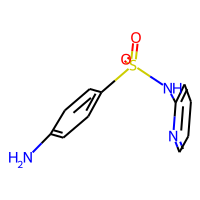
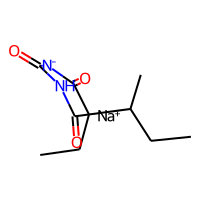
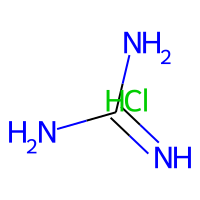
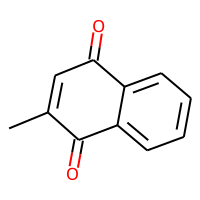
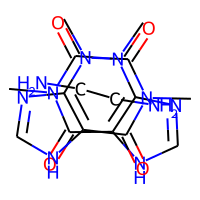

In [57]:
mol_df.head()

### 7.1.4 Calculate and plot the first two shape moments for a set of molecules

Read a SMILES file with drugs from ChEMBL into a Pandas dataframe

In [ ]:
drug_df = pd.read_csv("https://raw.githubusercontent.com/PatWalters/datafiles/main/chembl_drugs.smi",
                     names=["SMILES","Name"],sep=" ")

Add a molecule column to the dataframe

In [ ]:
drug_df['mol'] = drug_df.SMILES.progress_apply(Chem.MolFromSmiles)

  0%|          | 0/1203 [00:00<?, ?it/s]

In [ ]:
drug_df

,SMILES,Name,mol
0,Nc1ccc(S(=O)(=O)Nc2ccccn2)cc1,CHEMBL700,"<img data-content=""rdkit/molecule"" src=""data:i..."
1,CCC(C)C1(CC)C(=O)[N-]C(=O)NC1=O.[Na+],CHEMBL1200982,"<img data-content=""rdkit/molecule"" src=""data:i..."
2,Cl.N=C(N)N,CHEMBL1200728,"<img data-content=""rdkit/molecule"" src=""data:i..."
3,CC1=CC(=O)c2ccccc2C1=O,CHEMBL590,"<img data-content=""rdkit/molecule"" src=""data:i..."
4,Cn1c(=O)c2[nH]cnc2n(C)c1=O.Cn1c(=O)c2[nH]cnc2n...,CHEMBL1370561,"<img data-content=""rdkit/molecule"" src=""data:i..."
...,...,...,...
1198,Cl.Cl.N#Cc1cccc(C(NCC2CC2)c2ccc(F)c(NC(=O)c3cc...,CHEMBL4594272,"<img data-content=""rdkit/molecule"" src=""data:i..."
1199,CN1CCC(COc2cnc(-c3cccc(Cn4nc(-c5cccc(C#N)c5)cc...,CHEMBL4594292,"<img data-content=""rdkit/molecule"" src=""data:i..."
1200,Nc1ncn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1,CHEMBL1489,"<img data-content=""rdkit/molecule"" src=""data:i..."
1201,COC(=O)Nc1c(N)nc(-c2nn(Cc3ccccc3F)c3ncc(F)cc23...,CHEMBL4066936,"<img data-content=""rdkit/molecule"" src=""data:i..."
